In [37]:
%run Package_AND_Parameter.ipynb
%run Feature_Selection_Methods.ipynb
%run Smoothing.ipynb

In [2]:
tr_df = pd.read_csv('training_dataframe.csv', header=[0,1], index_col=[0,1])
tr_df.index.names = ['epoch','condition']
tr_df.reset_index(level = 1,inplace = True)

train_X = tr_df.drop(columns=['condition'])
train_Y = tr_df['condition']

C:\Users\vita7\Anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [3]:
tr_df.head()

Function      condition        STD                                    \
Band                    EEG Fpz-Cz EEG Fpz-Cz Delta EEG Fpz-Cz Theta   
epoch                                                                  
2748      Sleep stage W  26.927006        24.277687         7.457695   
2749      Sleep stage W  25.959272        24.305769         8.454548   
2750      Sleep stage W  30.553010        28.694277         8.191651   
2751      Sleep stage W  24.702906        23.380577         7.912746   
2752      Sleep stage W  27.000694        25.876028         7.868925   

Function                                                                   \
Band     EEG Fpz-Cz Alpha EEG Fpz-Cz Sigma EEG Fpz-Cz Beta EEG Fpz-Cz DOR   
epoch                                                                       
2748             3.500960         2.997098        4.092367       0.901611   
2749             2.866176         2.827287        4.223930       0.936304   
2750             3.021272         2.591944        3.603918       0.939164   
2751             2.867790         2.623439        3.752866       0.946471   
2752             2.902305         2.234328        3.293580       0.958347   

Function                                ...         AR_Coe_7                   \
Band     EEG Fpz-Cz TOR EEG Fpz-Cz AOR  ... EEG Fpz-Cz Theta EEG Fpz-Cz Alpha   
epoch                                   ...                                     
2748           0.276960       0.130017  ...         0.269376         0.020181   
2749           0.325685       0.110410  ...         0.371517         0.333159   
2750           0.268113       0.098886  ...         0.380113         0.953703   
2751           0.320316       0.116091  ...         0.377148         0.926918   
2752           0.291434       0.107490  ...         0.427124         0.992185   

Function                                    AR_Coe_8                   \
Band     EEG Fpz-Cz Sigma EEG Fpz-Cz Beta EEG Fpz-Cz EEG Fpz-Cz Delta   
epoch                                                                   
2748            -0.010638        0.026791  -0.132380        -0.090111   
2749             0.046058        2.753195  -0.131894        -0.658821   
2750             0.102628        2.827717  -0.109176        -0.647536   
2751             0.238291        2.907600  -0.174530        -0.636907   
2752            -0.028070        2.720786  -0.099471        -0.637745   

Function                                                                     
Band     EEG Fpz-Cz Theta EEG Fpz-Cz Alpha EEG Fpz-Cz Sigma EEG Fpz-Cz Beta  
epoch                                                                        
2748            -0.640106         0.142353        -0.053801       -0.063631  
2749            -0.772634         0.051013        -0.082941       -0.698228  
2750            -0.738703        -0.108487        -0.081871       -0.722311  
2751            -0.761361        -0.089840        -0.148386       -0.729589  
2752            -0.748931        -0.118923        -0.052184       -0.708171  

[5 rows x 427 columns]

In [4]:
train_X = train_X.astype(np.float32)
train_X.head()

Function        STD                                                     \
Band     EEG Fpz-Cz EEG Fpz-Cz Delta EEG Fpz-Cz Theta EEG Fpz-Cz Alpha   
epoch                                                                    
2748      26.927006        24.277687         7.457695         3.500960   
2749      25.959272        24.305769         8.454548         2.866176   
2750      30.553011        28.694277         8.191651         3.021272   
2751      24.702906        23.380577         7.912746         2.867790   
2752      27.000694        25.876028         7.868925         2.902305   

Function                                                                 \
Band     EEG Fpz-Cz Sigma EEG Fpz-Cz Beta EEG Fpz-Cz DOR EEG Fpz-Cz TOR   
epoch                                                                     
2748             2.997098        4.092367       0.901611       0.276960   
2749             2.827287        4.223930       0.936304       0.325685   
2750             2.591944        3.603918       0.939164       0.268113   
2751             2.623439        3.752866       0.946471       0.320316   
2752             2.234328        3.293580       0.958347       0.291434   

Function                                ...         AR_Coe_7                   \
Band     EEG Fpz-Cz AOR EEG Fpz-Cz SOR  ... EEG Fpz-Cz Theta EEG Fpz-Cz Alpha   
epoch                                   ...                                     
2748           0.130017       0.111305  ...         0.269376         0.020181   
2749           0.110410       0.108912  ...         0.371517         0.333159   
2750           0.098886       0.084834  ...         0.380113         0.953703   
2751           0.116091       0.106200  ...         0.377148         0.926918   
2752           0.107490       0.082751  ...         0.427124         0.992185   

Function                                    AR_Coe_8                   \
Band     EEG Fpz-Cz Sigma EEG Fpz-Cz Beta EEG Fpz-Cz EEG Fpz-Cz Delta   
epoch                                                                   
2748            -0.010638        0.026791  -0.132380        -0.090111   
2749             0.046058        2.753195  -0.131894        -0.658821   
2750             0.102628        2.827717  -0.109176        -0.647536   
2751             0.238291        2.907600  -0.174530        -0.636907   
2752            -0.028070        2.720786  -0.099471        -0.637745   

Function                                                                     
Band     EEG Fpz-Cz Theta EEG Fpz-Cz Alpha EEG Fpz-Cz Sigma EEG Fpz-Cz Beta  
epoch                                                                        
2748            -0.640106         0.142353        -0.053801       -0.063631  
2749            -0.772634         0.051013        -0.082941       -0.698228  
2750            -0.738703        -0.108487        -0.081871       -0.722311  
2751            -0.761361        -0.089840        -0.148386       -0.729589  
2752            -0.748931        -0.118923        -0.052184       -0.708171  

[5 rows x 426 columns]

In [5]:
train_X.describe()

Function           STD                                                     \
Band        EEG Fpz-Cz EEG Fpz-Cz Delta EEG Fpz-Cz Theta EEG Fpz-Cz Alpha   
count     89847.000000     89847.000000     89847.000000     89847.000000   
mean         18.583536        16.029860         5.376452         3.354793   
std           9.860544         9.614739         2.087426         1.522613   
min           2.295897         1.964965         0.774077         0.428669   
25%          11.132796         8.694450         3.946190         2.322744   
50%          16.613373        13.930181         4.998319         3.056740   
75%          23.749266        21.208904         6.379545         4.003140   
max          95.389458        92.882454        23.242401        22.907801   

Function                                                                 \
Band     EEG Fpz-Cz Sigma EEG Fpz-Cz Beta EEG Fpz-Cz DOR EEG Fpz-Cz TOR   
count        89847.000000    89847.000000   89847.000000   89847.000000   
mean             2.909930        3.144706       0.842807       0.328067   
std              1.522335        2.600281       0.135883       0.117471   
min              0.397527        0.476103       0.070574       0.031074   
25%              1.914096        1.704947       0.793875       0.240753   
50%              2.582422        2.428247       0.888887       0.314836   
75%              3.522642        3.584074       0.938646       0.400228   
max             26.764620       50.224781       1.003312       0.867037   

Function                                ...         AR_Coe_7                   \
Band     EEG Fpz-Cz AOR EEG Fpz-Cz SOR  ... EEG Fpz-Cz Theta EEG Fpz-Cz Alpha   
count      89847.000000   89847.000000  ...     89847.000000     89847.000000   
mean           0.214062       0.182627  ...         0.615539         0.812375   
std            0.111118       0.092965  ...         0.159629         0.907450   
min            0.024253       0.014994  ...         0.061071        -1.634852   
25%            0.131709       0.111047  ...         0.495722         0.032944   
50%            0.192049       0.166274  ...         0.617753         0.714062   
75%            0.268847       0.237107  ...         0.735885         1.558583   
max            0.846497       0.692532  ...         1.156001         3.168323   

Function                                       AR_Coe_8                   \
Band     EEG Fpz-Cz Sigma EEG Fpz-Cz Beta    EEG Fpz-Cz EEG Fpz-Cz Delta   
count        89847.000000    89847.000000  89847.000000     89847.000000   
mean             1.369646        1.814195     -0.145442        -0.340397   
std              1.038689        0.740852      0.078115         0.226184   
min             -1.782399       -1.399675     -0.462717        -0.890292   
25%              0.440536        1.393763     -0.190805        -0.543452   
50%              1.208468        1.990518     -0.146725        -0.358008   
75%              2.187380        2.387646     -0.104343        -0.146133   
max              4.417508        3.509475      0.243660         0.370480   

Function                                                                     
Band     EEG Fpz-Cz Theta EEG Fpz-Cz Alpha EEG Fpz-Cz Sigma EEG Fpz-Cz Beta  
count        89847.000000     89847.000000     89847.000000    89847.000000  
mean            -0.767189        -0.087304        -0.280963       -0.487214  
std              0.016745         0.229715         0.183226        0.170230  
min             -1.021990        -0.683294        -0.862812       -0.904970  
25%             -0.777979        -0.276052        -0.416488       -0.620609  
50%             -0.767305        -0.055196        -0.240058       -0.524515  
75%             -0.756419         0.106142        -0.133794       -0.386436  
max             -0.590415         0.540827         0.378089        0.252907  

[8 rows x 426 columns]

# Deskewness

# Feature Selection & Model Fitting

### Encoding And Model generating

In [32]:
# Label encoding for toget
trY = preprocessing.LabelEncoder().fit_transform(train_Y)
# Encoding
trX = StandardScaler().fit_transform(train_X)
estimator = LinearDiscriminantAnalysis()

In [7]:
estimator.get_params

<bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)>

In [8]:
trX.shape

(89847, 426)

df = pd.DataFrame(trX)
df.columns = train_X.columns
df.to_csv('trainingX.csv')

### Filter Methods selection

In [33]:
# ANOVA - F
selector_1 = feature_selection.SelectKBest(feature_selection.f_classif,k=200)
selector_1.fit(trX,trY)
idx1 = list(selector_1.get_support(indices=True))

print(len(idx1))

200


In [36]:
# tree
Dtree = tree.DecisionTreeClassifier()
para_tree = {'criterion':['gini','entropy'],'max_depth':np.arange(3:10),}
# SVC
lsvc = LinearSVC()

In [426]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(trX, trY)
selector_2 = SelectFromModel(lsvc, prefit=True)
idx2 = list(selector_2.get_support(indices=True))

print(len(idx2))

174


In [22]:
idx = list(set(idx1) & set(idx2))
trX = trX[:,idx]
trX.shape

(89847, 53)

idx = [i for i in idx1 if i in idx2]
trX = trX[:,idx]
trX.shape

df = pd.DataFrame(trX)
df.to_csv('Selected_tr.csv')

# Model fitting

### Additional Feature

### Fitting

In [ ]:
# GridSearchCV
clf = GridSearchCV(Dtree,)

In [23]:
REPORT(estimator=estimator,X=trX,Y=trY,kf=10)

C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.33      0.14      0.20       277
           1       0.70      0.81      0.75       794
           2       0.87      0.74      0.80       530
           3       0.56      0.70      0.63       471
           4       0.84      0.84      0.84       923

    accuracy                           0.73      2995
   macro avg       0.66      0.65      0.64      2995
weighted avg       0.72      0.73      0.71      2995

0.6407673560312609


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.38      0.15      0.22       285
           1       0.71      0.78      0.75       854
           2       0.83      0.75      0.79       503
           3       0.58      0.73      0.65       454
           4       0.83      0.85      0.84       899

    accuracy                           0.73      2995
   macro avg       0.67      0.65      0.65      2995
weighted avg       0.72      0.73      0.72      2995

0.6457304551630734


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.37      0.15      0.22       261
           1       0.73      0.79      0.76       892
           2       0.81      0.73      0.77       483
           3       0.59      0.68      0.63       516
           4       0.81      0.87      0.84       843

    accuracy                           0.73      2995
   macro avg       0.66      0.64      0.64      2995
weighted avg       0.71      0.73      0.71      2995

0.6398319052572923


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.30      0.11      0.16       294
           1       0.71      0.84      0.77       832
           2       0.85      0.72      0.78       472
           3       0.58      0.74      0.65       463
           4       0.84      0.83      0.83       934

    accuracy                           0.73      2995
   macro avg       0.66      0.65      0.64      2995
weighted avg       0.71      0.73      0.71      2995

0.6438382804669083


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.42      0.15      0.22       284
           1       0.70      0.79      0.74       837
           2       0.83      0.75      0.79       524
           3       0.56      0.72      0.63       446
           4       0.85      0.86      0.86       904

    accuracy                           0.73      2995
   macro avg       0.67      0.65      0.65      2995
weighted avg       0.72      0.73      0.72      2995

0.6491201350565303


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.31      0.11      0.16       257
           1       0.72      0.81      0.76       864
           2       0.85      0.73      0.79       491
           3       0.60      0.72      0.65       483
           4       0.84      0.86      0.85       900

    accuracy                           0.74      2995
   macro avg       0.66      0.65      0.64      2995
weighted avg       0.72      0.74      0.72      2995

0.6521864463156797


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.29      0.09      0.14       279
           1       0.70      0.81      0.75       814
           2       0.88      0.73      0.80       547
           3       0.56      0.72      0.63       469
           4       0.82      0.85      0.84       886

    accuracy                           0.72      2995
   macro avg       0.65      0.64      0.63      2995
weighted avg       0.71      0.72      0.71      2995

0.6392585847987461


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.33      0.16      0.21       245
           1       0.71      0.78      0.75       851
           2       0.84      0.75      0.79       502
           3       0.58      0.67      0.62       486
           4       0.82      0.85      0.83       911

    accuracy                           0.73      2995
   macro avg       0.66      0.64      0.64      2995
weighted avg       0.72      0.73      0.72      2995

0.6394259391202053


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.34      0.11      0.17       290
           1       0.72      0.81      0.77       812
           2       0.84      0.77      0.80       475
           3       0.62      0.73      0.67       504
           4       0.83      0.86      0.84       914

    accuracy                           0.74      2995
   macro avg       0.67      0.66      0.65      2995
weighted avg       0.72      0.74      0.72      2995

0.6569691174756065


C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

           0       0.44      0.12      0.19       311
           1       0.72      0.81      0.76       867
           2       0.83      0.76      0.79       479
           3       0.58      0.74      0.65       473
           4       0.84      0.86      0.85       864

    accuracy                           0.74      2994
   macro avg       0.68      0.66      0.65      2994
weighted avg       0.72      0.74      0.72      2994

0.652588370824519


In [444]:
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.7, 0.8,0.9]
train_size,train_scores,test_scores = learning_curve(L1_Reg,trX,trY,cv=10,train_sizes=[0.1,0.2,0.4,0.6,0.7,0.8])
new_train_scores=train_scores.mean(1)
train_std=train_scores.std()
test_std=test_scores.std()
new_test_scores=test_scores.mean(1)

C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.859081331326706, tolerance: 1.165446611427158
  positive)
C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.071841307615614, tolerance: 2.6551273311897097
  positive)
C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.343240605772735, tolerance: 5.941340956591639
  positive)
C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

KeyboardInterrupt: 

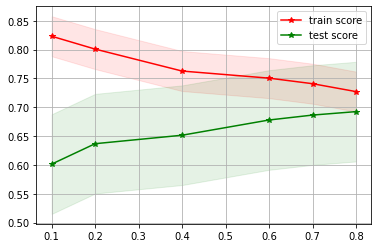

In [433]:
plt.grid()
plt.fill_between(train_sizes,new_train_scores-train_std,
                 new_train_scores+train_std,color='r',alpha=0.1)
plt.fill_between(train_sizes,new_test_scores-test_std,
                 new_test_scores+test_std,color='g',alpha=0.1)
 
plt.plot(train_sizes,new_train_scores,'*-',c='r',label='train score')
plt.plot(train_sizes,new_test_scores,'*-',c='g',label='test score')
plt.legend(loc='best')
plt.show()

In [26]:
train_score2, validation_score2 = validation_curve(
    tree,
    trX,
    trY,
    param_name='max_depth',
    cv=10,
    param_range=np.arange(3,10))

train_score2_mean=train_score2.mean(1)
train_score2_std=train_score2.std(1)
validation_score2_mean=validation_score2.mean(1)
validation_score2_std=validation_score2.std(1)

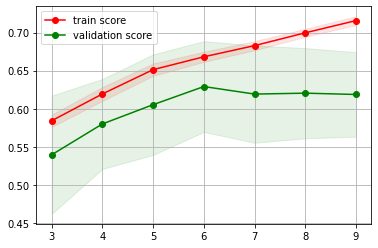

In [27]:
plt.grid()
x_axis = np.arange(3,10)
plt.fill_between(x_axis,train_score2_mean-train_score2_std,
                 train_score2_mean+train_score2_std,color='r',alpha=0.1)
plt.fill_between(x_axis,validation_score2_mean-validation_score2_std,
                 validation_score2_mean+validation_score2_std,color='g',alpha=0.1)
 
plt.plot(x_axis,train_score2_mean,'o-',c='r',label='train score')
plt.plot(x_axis,validation_score2_mean,'o-',c='g',label='validation score')
plt.legend(loc='best')
plt.show()

# All of the features
cv = cross_val_score(estimator, trX, trY, cv=5).mean()

with open("REPORT.csv", "a+") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['OverallAcc',cv])

# Level_0 ACC
cv_ = []

for i in list(train_X.columns.get_level_values(0).unique()):
    trX = encoder.fit_transform(train_X.xs(i,level = 0,axis=1))
    cv_.append(cross_val_score(estimator, trX, trY, cv=5).mean())

with open("REPORT.csv", "a+") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([""]+list(train_X.columns.get_level_values(0).unique()))
    writer.writerow(['Level_0_Acc']+cv_)

# Level_1 ACC
cv_=[]

for i in list(train_X.columns.get_level_values(1).unique()):
    trX = encoder.fit_transform(train_X.xs(i,level = 1,axis=1))
    cv_.append(cross_val_score(estimator, trX, trY, cv=5).mean())

with open("REPORT.csv", "a+") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([""]+list(train_X.columns.get_level_values(1).unique()))
    writer.writerow(['Level_1_Acc']+cv_)

# Level_2 ACC
cv_=[]

for i in list(train_X.columns):
    trX = encoder.fit_transform(train_X[[i]])
    cv_.append(cross_val_score(estimator, trX, trY, cv=5).mean())

with open("REPORT.csv", "a+") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([""]+list(train_X.columns))
    writer.writerow(['Level_2_Acc']+cv_)

# Collinarity dection

temp = add_constant(trX)
VIF_ = [variance_inflation_factor(temp, i) for i in range(temp.shape[1])][1:]
df = pd.DataFrame(VIF_)
df.to_csv('VIF_.csv')
df